- The outputs from the pest analysis is analyzed here. The following notebook provides a template for future notebooks. I have analyzed the outputs in two types:

File name - ind_pargrp_1.demo

1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU) - - Check from Pg. 100 - pestpp.5.0.8_manual.pdf
    - Input data
    - Sensitivity
    - Objective function
    - Residuals
    - Relative contribution of temperature and moisture on the objective function
    - Identifibility tool (TODO)
    - Covariance matrix (TODO)
2. PESTools analysis (https://github.com/PESTools/pestools
    - https://nbviewer.org/github/PESTools/pestools/blob/master/examples/MODFLOW%20and%20More%202015%20Paper.ipynb)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(0,'../pestools')

In [3]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/pestpp/pestpp/rk_model


In [9]:
import pestools

In [10]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

In [12]:
directory_name = 'ind_pargrp_1.demo'

In [14]:
# Using a normal method to access the parameter data:
# Exporting the parameter group csv file
pargrp = pd.read_csv(f'{directory_name}/rk_model_glm.pargrp_data.csv')
pargrp

,pargpnme,inctyp,derinc,derinclb,forcen,derincmul,dermthd
0,n_m_gp,relative,0.1,0.0,switch,1.0,parabolic
1,tcs_m_gp,relative,0.1,0.0,switch,1.0,parabolic
2,af_m_gp,relative,0.1,0.0,switch,1.0,parabolic
3,af_p_gp,relative,0.1,0.0,switch,1.0,parabolic


In [15]:
# Parameter data
pardat = pd.read_csv(f'{directory_name}/rk_model_glm.par_data.csv')
pardat

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
0,n_m,none,factor,1.200,1.050,3.00,n_m_gp,1.0,0.0,1
1,tcs_m,none,factor,1.000,0.800,2.50,tcs_m_gp,1.0,0.0,1
2,af_m,none,factor,0.050,0.020,0.10,af_m_gp,1.0,0.0,1
3,af_p,none,factor,0.005,0.002,0.01,af_p_gp,1.0,0.0,1


In [16]:
# Observation data
obsdat = pd.read_csv(f'{directory_name}/rk_model_glm.obs_data.csv')
obsdat.head()

,obsnme,obsval,weight,obgnme
0,stemp_0.04_0,261.023264,0.000196,temp
1,stemp_0.04_1,261.006667,0.000196,temp
2,stemp_0.04_2,260.854861,0.000196,temp
3,stemp_0.04_3,261.032708,0.000196,temp
4,stemp_0.04_4,261.347014,0.000196,temp


#### b. Parameter Sensitivity 

In [17]:
sen_iteration = pd.read_csv(f'{directory_name}/rk_model_glm_cf.isen')
sen_iteration.index = sen_iteration['iteration']
sen_iteration.drop(axis=1, columns=['iteration'], inplace=True)
sen_iteration

,n_m,tcs_m,af_m,af_p
iteration,,,,
1,0.000003,0.000002,0.000003,0.000028


In [21]:
sen_iteration.iloc[0,:]

n_m      0.000003
tcs_m    0.000002
af_m     0.000003
af_p     0.000028
Name: 1, dtype: float64

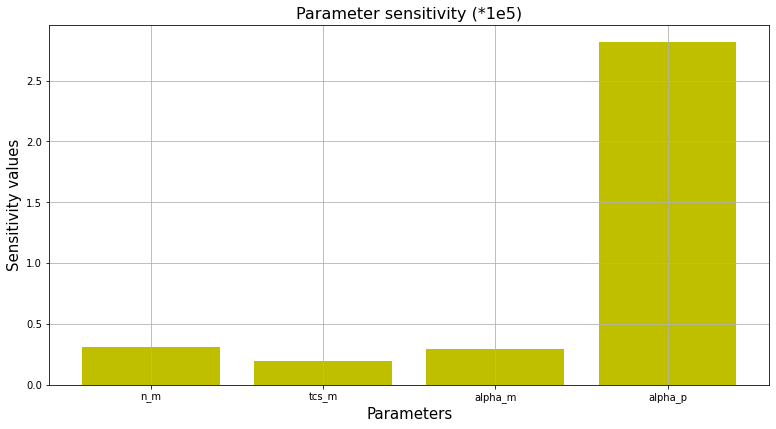

In [27]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_axes([0,0,1,1])
labels = ['n_m','tcs_m','alpha_m','alpha_p'] 
ax.bar(labels, sen_iteration.iloc[0,:]*1e5, color='y')
#ax.bar(X + 0.25, sen_iteration.iloc[1,:], color='b', label='2nd itr', width=0.25)
#ax.bar(X + 0.5, sen_iteration.iloc[2,:], color='k', label='3rd itr', width=0.25)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, 4, 1)
ax.set_xticks(major_ticks)
#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels = ['n_m','tcs_m','alpha_m','alpha_p'] 
#ax.set_xticklabels(labels)
#ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.set_title('Parameter sensitivity (*1e5)', fontsize=16)
ax.grid()

##### Relative sensitivity values

In [28]:
sen_iteration.iloc[0,:].max()

2.81607e-05

In [29]:
relative_set_itr = sen_iteration.copy()
for i, value in enumerate(sen_iteration.index):
    relative_set_itr.iloc[i,:] = relative_set_itr.iloc[0,:]/relative_set_itr.iloc[0,:].max()

relative_set_itr

,n_m,tcs_m,af_m,af_p
iteration,,,,
1,0.110143,0.069361,0.103518,1.0


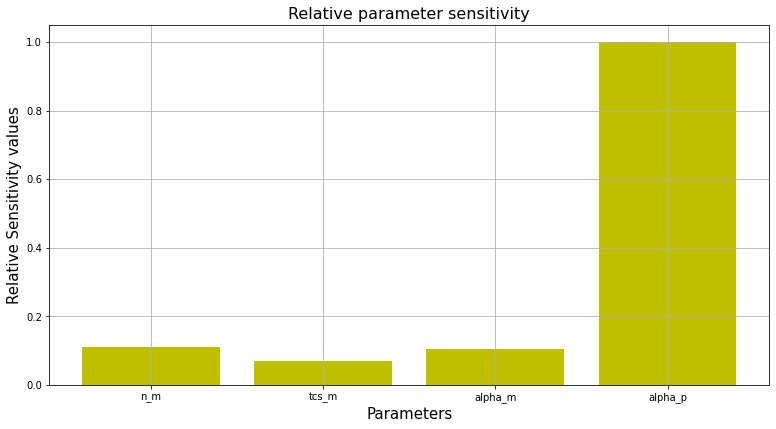

In [32]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_axes([0,0,1,1])
labels = ['n_m','tcs_m','alpha_m','alpha_p'] 
ax.bar(labels, relative_set_itr.iloc[0,:], color='y')
#ax.bar(X + 0.25, sen_iteration.iloc[1,:], color='b', label='2nd itr', width=0.25)
#ax.bar(X + 0.5, sen_iteration.iloc[2,:], color='k', label='3rd itr', width=0.25)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, 4, 1)
ax.set_xticks(major_ticks)
#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels = ['n_m','tcs_m','alpha_m','alpha_p'] 
#ax.set_xticklabels(labels)
#ax.legend(fontsize=14)
ax.set_ylabel('Relative Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.set_title('Relative parameter sensitivity', fontsize=16)
ax.grid()

### Plotting the change in parameters:


In [33]:
par_iteration = pd.read_csv(f'{directory_name}/rk_model_glm_cf.ipar')
par_iteration.index = par_iteration['iteration']
par_iteration.drop(axis=1, columns=['iteration'], inplace=True)
par_iteration

,n_m,tcs_m,af_m,af_p
iteration,,,,
0,1.2,1,0.050000,0.0050
1,1.2,1,0.050005,0.0055


##### Changing the parameters relative to the initial value
- To ensure that we can plot the changes with respect to the parameters, we subtract the parameter values w.r.t the initial values and then multiply by 100.
\begin{equation}
    par_{change} = \frac{(par_{final} - par_{initial})}{par_{initial}} * 100
\end{equation}

In [34]:
par_change = par_iteration.copy()
pargp_initial = par_change.iloc[0,:]
for i, index_value in enumerate(par_change.index):
    for j, col_value in enumerate(par_change.index):
        #print(i, j)
        par_change.iloc[i,j] = (par_iteration.iloc[i,j] - par_iteration.iloc[0,j])/par_iteration.iloc[0,j]*100
#np.abs(par_change)
par_change

,n_m,tcs_m,af_m,af_p
iteration,,,,
0,0.0,0,0.050000,0.0050
1,0.0,0,0.050005,0.0055


#### Line plot of all parameter values


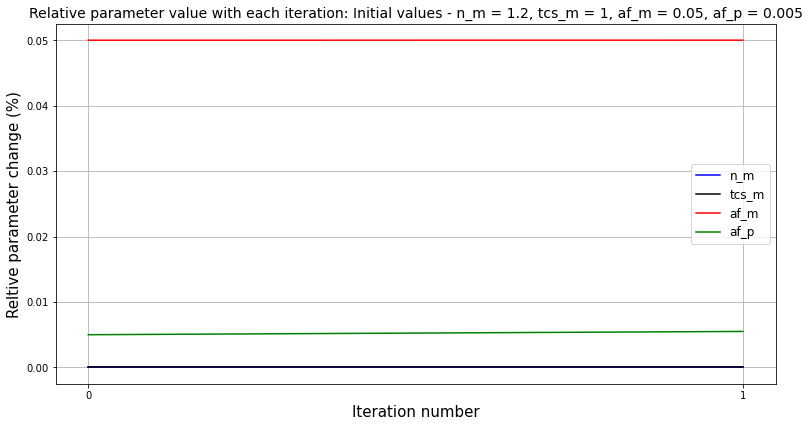

In [35]:
fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_axes([0,0,1,1])

ax.plot(par_change.iloc[:,0], 'b', label='n_m')
ax.plot(par_change.iloc[:,1], 'k', label='tcs_m')
ax.plot(par_change.iloc[:,2], 'r', label='af_m')
ax.plot(par_change.iloc[:,3], 'g',label='af_p')

ax.set_title(f'Relative parameter value with each iteration: Initial values - n_m = {np.round(par_iteration.iloc[0,0],5)}, tcs_m = {np.round(par_iteration.iloc[0,1],5)}, af_m = {np.round(par_iteration.iloc[0,2],5)}, af_p = {np.round(par_iteration.iloc[0,3],5)}', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Iteration number', fontsize=15)
ax.set_ylabel('Reltive parameter change (%)', fontsize=15)
ax.legend(fontsize=12)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid()

### c. Objective function

In [37]:
# Residual files - importing the values from the file
# Residual files after each iteration
no_iteration = np.arange(1,2,1)
for i, value in enumerate(no_iteration):
    locals()[f'res_{value}'] = pd.read_csv(f'{directory_name}/rk_model_glm_cf.rei{value}', skiprows=2,delim_whitespace=True)

#res_best = pd.read_csv(f'{directory_name}/rk_model_glm_cf.res', skiprows=2,delim_whitespace=True)
#res_best

In [39]:
res_1.head()

,Name,Group,Measured,Modelled,Residual,Weight
0,stemp_0.04_0,temp,261.023264,270.150000,-9.126736,0.000196
1,stemp_0.04_1,temp,261.006667,260.607825,0.398842,0.000196
2,stemp_0.04_2,temp,260.854861,260.405492,0.449369,0.000196
3,stemp_0.04_3,temp,261.032708,261.071966,-0.039258,0.000196
4,stemp_0.04_4,temp,261.347014,261.194927,0.152087,0.000196


In [40]:
# Following the code from line 94 - file : res.py
def obj_fun(rei_df):
    """
    Function defined to calculate the objective function along with the residual values
    
    Input: rei_df - Residual dataframe
    
    
    """
    
    # Apply weighted residual and calculate phi contributions
    rei_df['Weighted_Residual'] = rei_df['Residual'] * rei_df['Weight']
    rei_df['Absolute_Residual'] = abs(rei_df['Residual'])
    rei_df['Weighted_Absolute_Residual'] = rei_df['Absolute_Residual'] * rei_df['Weight']
    
    # Calculate phi
    rei_df['Weighted_Sq_Residual'] = rei_df['Weighted_Residual']**2
    
    # Percentage contribution by each observation
    rei_df['Phi_Percent'] = rei_df['Weighted_Sq_Residual']/(rei_df['Weighted_Sq_Residual'].sum())*100
    
    return rei_df

In [44]:
# Finding the variation of residuals
for i, value in enumerate(no_iteration):
    locals()[f'res_phi_{value}'] = obj_fun(locals()[f'res_{value}'])
    
#res_phi_1 = obj_fun(res_1)
res_phi_1.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,261.023264,270.150000,-9.126736,0.000196,-0.001786,9.126736,0.001786,3.189989e-06,1.412808
1,stemp_0.04_1,temp,261.006667,260.607825,0.398842,0.000196,0.000078,0.398842,0.000078,6.092002e-09,0.002698
2,stemp_0.04_2,temp,260.854861,260.405492,0.449369,0.000196,0.000088,0.449369,0.000088,7.733295e-09,0.003425
3,stemp_0.04_3,temp,261.032708,261.071966,-0.039258,0.000196,-0.000008,0.039258,0.000008,5.902111e-11,0.000026
4,stemp_0.04_4,temp,261.347014,261.194927,0.152087,0.000196,0.000030,0.152087,0.000030,8.858081e-10,0.000392


In [45]:
res_phi_1['Weighted_Sq_Residual'].mean()

4.418603171226061e-08

In [47]:
# Defining a dataframe with a objective function
# Changing the units by multiplying by 1e6

objfn_phi = pd.DataFrame(index=no_iteration,columns=['obj_func'])

for i in np.arange(1):
    objfn_phi.iloc[i,0] = locals()[f'res_phi_{i+1}']['Weighted_Sq_Residual'].mean()*1e7

objfn_phi

,obj_func
1,0.44186


In [48]:
#fig, ax = plt.subplots(figsize=(14, 6))

#plt.figure(figsize=(10, 6))
#ax.plot(objfn_phi['obj_func'])
#ax.set_title('Plotting objective function with each iteration ', fontsize=15)
#ax.set_ylabel('Objective function (*1e7)', fontsize=12)
#ax.set_xlabel('Iteration number', fontsize=12)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.grid()

The values were calculated using a formula. It not the same as the objective function calculated by the PEST program!

Comments:
    
* It shows here that the second iteration has the least objective function value

How to determine the parameter dataset and residual values with the best dataset?

#### Accessing the objective function with every iteration 

In [49]:
obj_iteration = pd.read_csv(f'{directory_name}/rk_model_glm_cf.iobj')
#obj_iteration.index = par_iteration['iteration']
obj_iteration.drop(axis=1, columns=['iteration'], inplace=True)
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.000226,0.000226,0,0.000222,0.000004
1,15,0.000226,0.000226,0,0.000222,0.000004


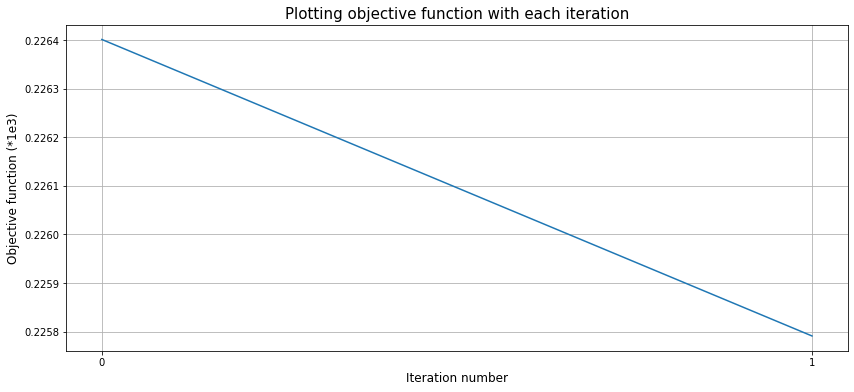

<Figure size 720x432 with 0 Axes>

In [50]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.figure(figsize=(10, 6))
ax.plot(obj_iteration['total_phi']*1e3)
ax.set_title('Plotting objective function with each iteration', fontsize=15)
ax.set_ylabel('Objective function (*1e3)', fontsize=12)
ax.set_xlabel('Iteration number', fontsize=12)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid()

**Comments:**
- Here it shows that the 1st iteration has reached the minimum objective function. The parameter dataset corresponding to this iteration will be the optimal one?

### d. Residuals
1. First choose the iteration with the minimum objective function value.
2. Then plot the residual based on this iteration

In [51]:
obj_iteration['total_phi'].idxmin()

1

In [52]:
# Finding the index where we will be encountering the minimum objective function
itrno_best = obj_iteration['total_phi'].idxmin()

# Finding the corresponding residuals
res_best = locals()[f'res_{itrno_best}'].copy()

res_best.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,261.023264,270.150000,-9.126736,0.000196,-0.001786,9.126736,0.001786,3.189989e-06,1.412808
1,stemp_0.04_1,temp,261.006667,260.607825,0.398842,0.000196,0.000078,0.398842,0.000078,6.092002e-09,0.002698
2,stemp_0.04_2,temp,260.854861,260.405492,0.449369,0.000196,0.000088,0.449369,0.000088,7.733295e-09,0.003425
3,stemp_0.04_3,temp,261.032708,261.071966,-0.039258,0.000196,-0.000008,0.039258,0.000008,5.902111e-11,0.000026
4,stemp_0.04_4,temp,261.347014,261.194927,0.152087,0.000196,0.000030,0.152087,0.000030,8.858081e-10,0.000392


In [53]:
temp_measured = res_best.iloc[:2555,2] # The 2nd column contains the measured values and we have only temperature values from the first 2555 values
mois_measured = res_best.iloc[2555:,2]

temp_sim = res_best.iloc[:2555,3] # The 3rd column contains the simulated values 
mois_sim = res_best.iloc[2555:,3]

temp_res = res_best.iloc[:2555,4] # The 4th column contains the residual values 
mois_res = res_best.iloc[2555:,4]

Text(0.5, 0, 'Days')

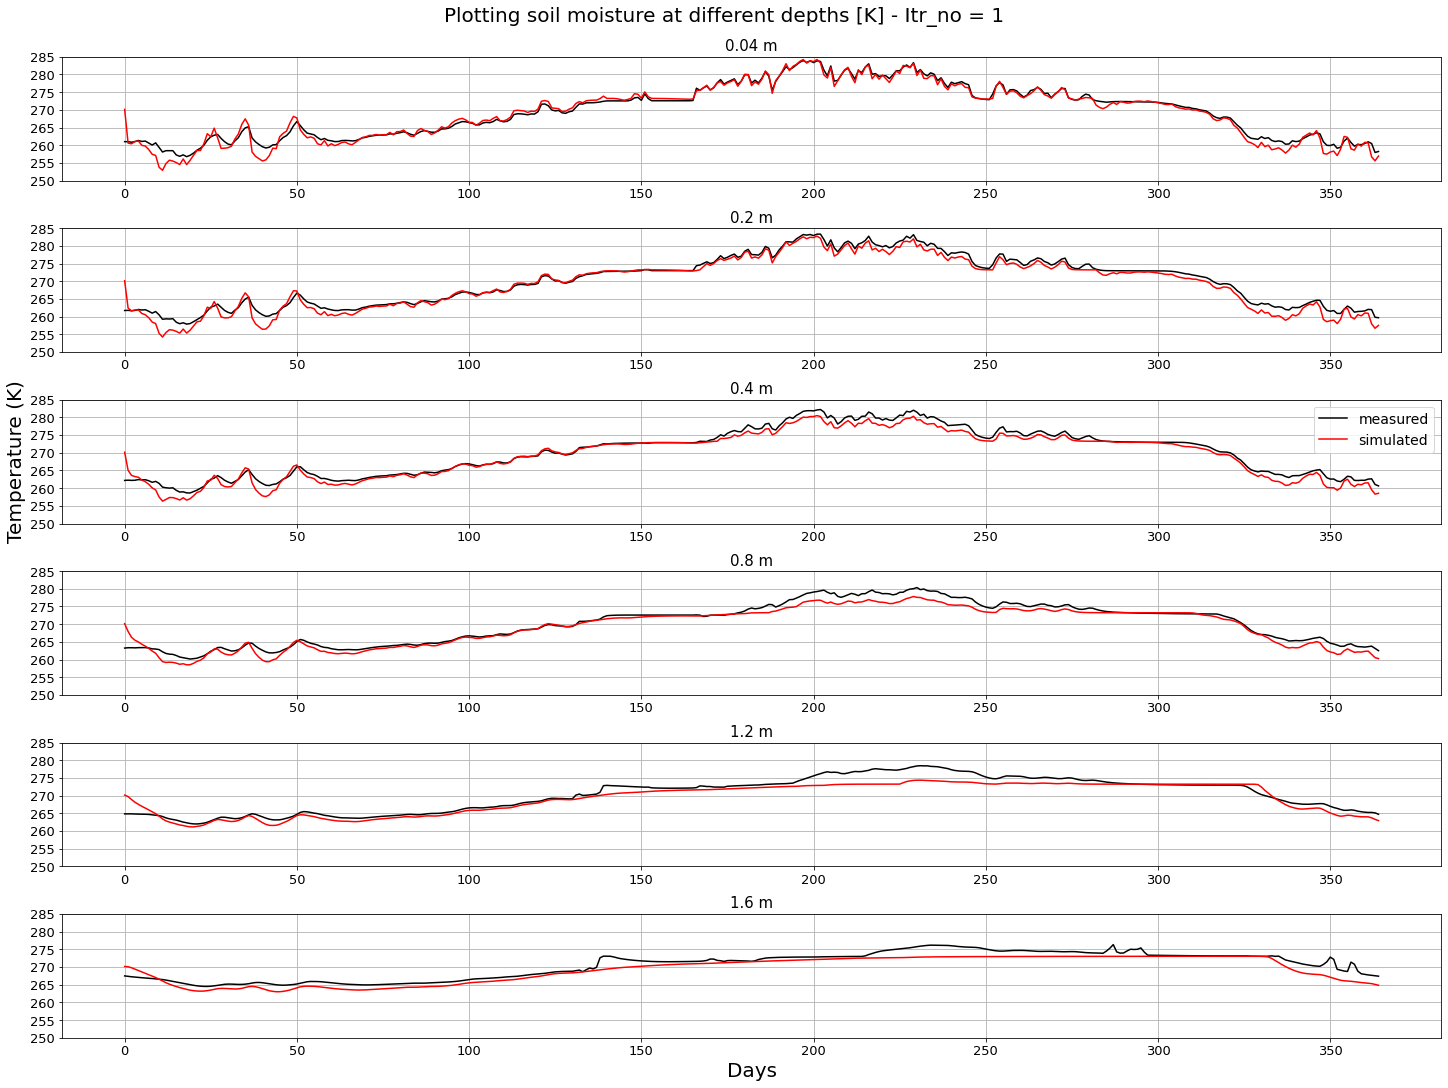

In [54]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim[x:x+365].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
* Temperature estimates have improved on changing the top B.C as Temp. at 0.0 m


In [55]:
mois_measured

2555    0.160038
2556    0.160179
2557    0.160040
2558    0.160321
2559    0.160742
          ...   
5105    0.168612
5106    0.167619
5107    0.166811
5108    0.166060
5109    0.165318
Name: Measured, Length: 2555, dtype: float64

Text(0.5, 0, 'Days')

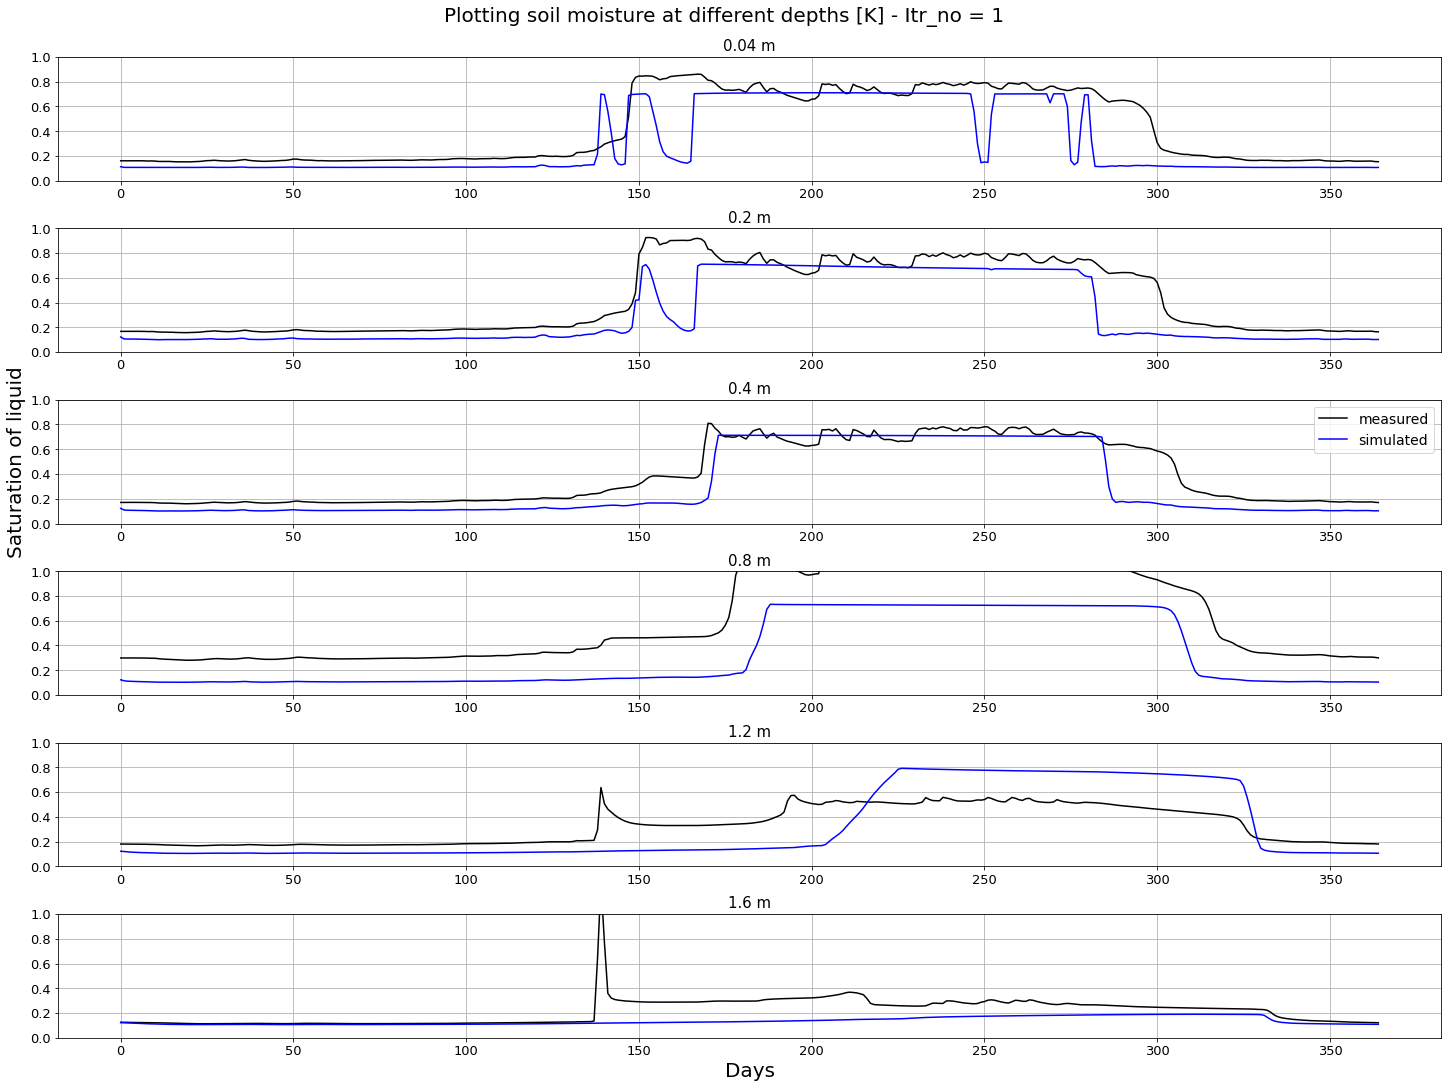

In [56]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim[x:x+365].values, 'b', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
1. The moisture estimates have been given lesser importance and hence we can improve the moisture estimates by changing the objective function
2. Physical processes such as precipitation, snow-melt, SEB etc. have not been included. Hence the model maybe incomplete.

<Figure size 720x432 with 0 Axes>

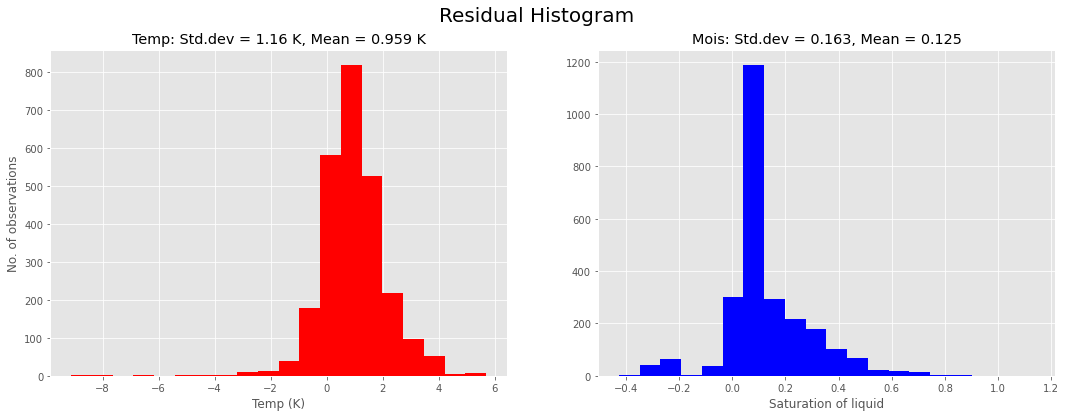

In [57]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Residual Histogram', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hist(temp_res, bins=20, color='r')
ax2.hist(mois_res, bins=20, color='b')
ax1.set_ylabel('No. of observations')
ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
ax1.set_xlabel('Temp (K)')
ax2.set_xlabel('Saturation of liquid')
plt.show()

**Comments:

1. The temperature observations show greater standard deviation compared to the moisture - Hence we need to consider to reweight the objective function. 
2.  The temperature is more or less equally distributed along the center. 
3. The moisture depicts a skew along the positive side of saturation of liquid. 

In [58]:
temp_res.describe()

count    2555.000000
mean        0.959176
std         1.160067
min        -9.126736
25%         0.272159
50%         0.931509
75%         1.550483
max         5.688443
Name: Residual, dtype: float64

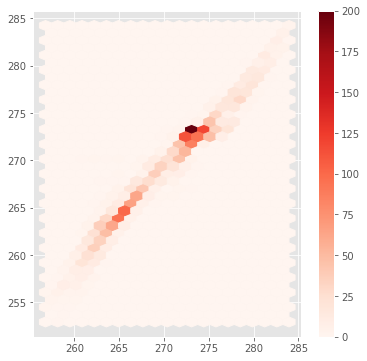

In [59]:
plt.figure(figsize=(6, 6))
plt.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

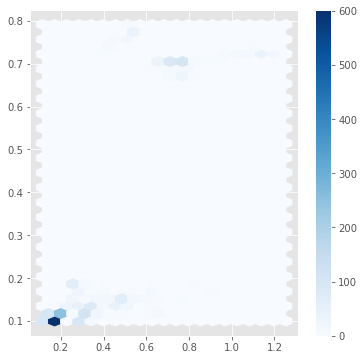

In [60]:
plt.figure(figsize=(6, 6))
plt.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Moisture')

<Figure size 720x432 with 0 Axes>

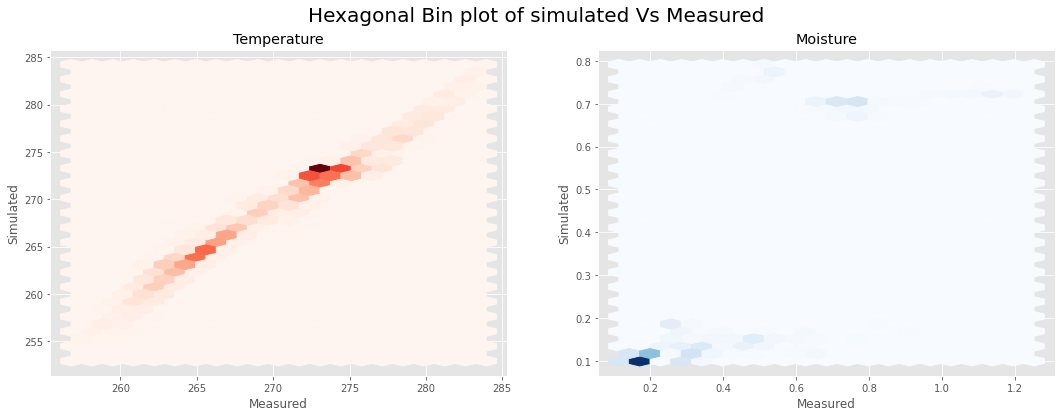

In [61]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hexagonal Bin plot of simulated Vs Measured', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
#plt.colorbar()
ax1.set_ylabel('Simulated')
ax1.set_xlabel('Measured')
ax1.set_title('Temperature')

ax2.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
ax2.set_ylabel('Simulated')
ax2.set_xlabel('Measured')
ax2.set_title('Moisture')

#plt.colorbar(cax=ax1)

#ax1.hist(temp_res, bins=20, color='r')
#ax2.hist(mois_res, bins=20, color='b')
#ax1.set_ylabel('No. of observations')
#ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
#ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
#ax1.set_xlabel('Temp (K)')
#ax2.set_xlabel('Saturation of liquid')
#img1 = ax1.imshow(fig)
#fig.colorbar(img1)

#### f. Relative contribution of temperature and moisture on the objective function

In [62]:
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.000226,0.000226,0,0.000222,0.000004
1,15,0.000226,0.000226,0,0.000222,0.000004


In [63]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

np.array(obj_itr_best[['temp','mois']])*1e6

array([221.648  ,   4.14221])

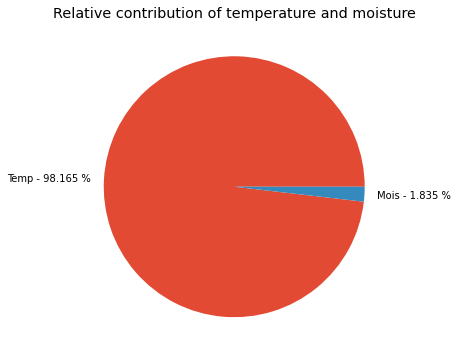

In [64]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

con_variables = np.array(obj_itr_best[['temp','mois']])/obj_itr_best['measurement_phi']*100

### To find the percentage contribution, we need subtract it with total_phi and multiply 

plt.figure(figsize=(6,6))
plt.title('Relative contribution of temperature and moisture')
mylabels=[f'Temp - {np.round(con_variables[0],3)} %',f'Mois - {np.round(con_variables[1],3)} %']
plt.pie(con_variables,labels=mylabels)
#plt.legend()
plt.show()
#plt.legend()

#### f. Identifibility tool - Identifiability is defined here as the capability of model calibration to constrain parameters used by a model.
- Go through the article and extract results later!

#### g. Plotting the covariance matrix for the variables

### Reweighting strategy:

In [65]:
res_1['new_w'] = res_1  

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,261.023264,270.150000,-9.126736,0.000196,-0.001786,9.126736,0.001786,3.189989e-06,1.412808
1,stemp_0.04_1,temp,261.006667,260.607825,0.398842,0.000196,0.000078,0.398842,0.000078,6.092002e-09,0.002698
2,stemp_0.04_2,temp,260.854861,260.405492,0.449369,0.000196,0.000088,0.449369,0.000088,7.733295e-09,0.003425
3,stemp_0.04_3,temp,261.032708,261.071966,-0.039258,0.000196,-0.000008,0.039258,0.000008,5.902111e-11,0.000026
4,stemp_0.04_4,temp,261.347014,261.194927,0.152087,0.000196,0.000030,0.152087,0.000030,8.858081e-10,0.000392
...,...,...,...,...,...,...,...,...,...,...,...
5105,smois_1.6_360,mois,0.168612,0.113117,0.055494,0.000196,0.000011,0.055494,0.000011,1.179374e-10,0.000052
5106,smois_1.6_361,mois,0.167619,0.112864,0.054755,0.000196,0.000011,0.054755,0.000011,1.148186e-10,0.000051
5107,smois_1.6_362,mois,0.166811,0.112611,0.054200,0.000196,0.000011,0.054200,0.000011,1.125003e-10,0.000050
5108,smois_1.6_363,mois,0.166060,0.112329,0.053732,0.000196,0.000011,0.053732,0.000011,1.105648e-10,0.000049


### PESTools
- Check it out later - Correct the python code

In [19]:
# Direct it to the demo folder
example = pestools.Pest('test_pest_iterations_2.demo/rk_model_glm_cf')
directory_name = 'test_pest_iterations_2.demo'

In [20]:
example.parameter_data
# The above line might have not worked since we have a different PEST control file - version 2 (Do we consdider changing the version?)

ValueError: invalid literal for int() with base 10: 'noptmax'

In [32]:
example.observation_data

,obsnme,obsval,weight,obgnme
obsnme,,,,
stemp_0.04_0,stemp_0.04_0,261.023264,0.000196,temp
stemp_0.04_1,stemp_0.04_1,261.006667,0.000196,temp
stemp_0.04_2,stemp_0.04_2,260.854861,0.000196,temp
stemp_0.04_3,stemp_0.04_3,261.032708,0.000196,temp
stemp_0.04_4,stemp_0.04_4,261.347014,0.000196,temp
...,...,...,...,...
smois_1.6_360,smois_1.6_360,0.168612,0.000196,mois
smois_1.6_361,smois_1.6_361,0.167619,0.000196,mois
smois_1.6_362,smois_1.6_362,0.166811,0.000196,mois


In [33]:
# Using a normal method to access the parameter data:
# Exporting the parameter group csv file
pargrp = pd.read_csv(f'{directory_name}/rk_model_glm.pargrp_data.csv')
pargrp

,pargpnme,inctyp,derinc,derinclb,forcen,derincmul,dermthd
0,thermal,relative,0.01,0.0,switch,1.0,parabolic
1,hydraulic,relative,0.01,0.0,switch,1.0,parabolic


### Residuals
Following a PEST run, residual information can be read in, from a single .res file, or set of .rei files containing residual information by iteration. Ancillary observation information such as spatial coordinates, date/time, or measurement type can be read in from an observation information file.



#### Following notebook - https://nbviewer.org/github/pestools/pestools/blob/master/examples/Res.ipynb

In [36]:
# Extracting the 3rd residual file
res_3 = pestools.Res(f'{directory_name}/rk_model_glm_cf.rei3')
#residuals.plot_hexbin(['head_fair','wcrs1'],print_stats=['Mean','MAE','RMSE'])

In [37]:
res_3.df.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual
stemp_0.04_0,stemp_0.04_0,temp,261.023264,270.150000,-9.126736,0.000196,-0.001786,9.126736,0.001786,3.189989e-06
stemp_0.04_1,stemp_0.04_1,temp,261.006667,261.661200,-0.654534,0.000196,-0.000128,0.654534,0.000128,1.640673e-08
stemp_0.04_2,stemp_0.04_2,temp,260.854861,261.466022,-0.611161,0.000196,-0.000120,0.611161,0.000120,1.430439e-08
stemp_0.04_3,stemp_0.04_3,temp,261.032708,262.668817,-1.636109,0.000196,-0.000320,1.636109,0.000320,1.025138e-07
stemp_0.04_4,stemp_0.04_4,temp,261.347014,263.258102,-1.911088,0.000196,-0.000374,1.911088,0.000374,1.398684e-07


In [38]:
res_3.phi.head()

,Weighted_Sq_Residual
stemp_0.04_0,3.189989e-06
stemp_0.04_1,1.640673e-08
stemp_0.04_2,1.430439e-08
stemp_0.04_3,1.025138e-07
stemp_0.04_4,1.398684e-07


In [39]:
res_3.phi_by_group.head()

,Weighted_Sq_Residual,Percent
Group,,
mois,0.000005,0.801748
temp,0.000641,99.198252


* Comments: We need to definitely rescale the weights by using the function PWTADJ1

In [40]:
obsgroups = [g for g in res_3.obs_groups if 'regul' not in g]
obsgroups

['mois', 'temp']

In [41]:
res_3.describe_groups(['temp'])

AttributeError: 'DataFrame' object has no attribute 'ix'

In [ ]:
res_3.describe_groups('temp').loc[['Mean', 'MAE', 'RMSE']]

In [156]:
res_3.describe_groups('mois').loc[['Mean', 'MAE', 'RMSE']]

,Group summary
Mean,0.160113
MAE,0.163279
RMSE,0.230156


In [157]:
res_3.description

,n,Range,Max,Min,Mean,Standard deviation,Varience,25%,50%,75%,Max (absolute),Min (absolute),MAE,RMSE,RMSE/range,Normally Distributed,p-value
mois,2555.0,1.577963,1.137808,-0.440155,0.160113,0.165367,0.027346,0.057943,0.087693,0.212841,1.137808,0.000035,0.163279,0.230156,0.145857,True,0.0
temp,2555.0,17.09038,7.963644,-9.126736,1.66466,1.945372,3.784472,0.610736,1.657419,2.875546,9.126736,0.000241,2.087973,2.560094,0.149797,True,0.0


In [158]:
res_3.df.iloc[2555:,:]

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual
smois_0.04_0,smois_0.04_0,mois,0.160038,0.112516,0.047522,0.000196,0.000009,0.047522,0.000009,8.648455e-11
smois_0.04_1,smois_0.04_1,mois,0.160179,0.107321,0.052858,0.000196,0.000010,0.052858,0.000010,1.070003e-10
smois_0.04_2,smois_0.04_2,mois,0.160040,0.107272,0.052768,0.000196,0.000010,0.052768,0.000010,1.066354e-10
smois_0.04_3,smois_0.04_3,mois,0.160321,0.107593,0.052727,0.000196,0.000010,0.052727,0.000010,1.064709e-10
smois_0.04_4,smois_0.04_4,mois,0.160742,0.107771,0.052972,0.000196,0.000010,0.052972,0.000010,1.074603e-10
...,...,...,...,...,...,...,...,...,...,...
smois_1.6_360,smois_1.6_360,mois,0.168612,0.110668,0.057944,0.000196,0.000011,0.057944,0.000011,1.285786e-10
smois_1.6_361,smois_1.6_361,mois,0.167619,0.110599,0.057020,0.000196,0.000011,0.057020,0.000011,1.245133e-10
smois_1.6_362,smois_1.6_362,mois,0.166811,0.110518,0.056293,0.000196,0.000011,0.056293,0.000011,1.213565e-10
smois_1.6_363,smois_1.6_363,mois,0.166060,0.110392,0.055669,0.000196,0.000011,0.055669,0.000011,1.186804e-10


In [159]:
temp_measured = res_3.df.iloc[:2555,2] # The 2nd column contains the measured values and we have only temperature values from the first 2555 values
mois_measured = res_3.df.iloc[2555:,2]

temp_sim = res_3.df.iloc[:2555,3] # The 3rd column contains the simulated values 
mois_sim = res_3.df.iloc[2555:,3]

temp_res = res_3.df.iloc[:2555,4] # The 4th column contains the residual values 
mois_res = res_3.df.iloc[2555:,4]

<Figure size 720x432 with 0 Axes>

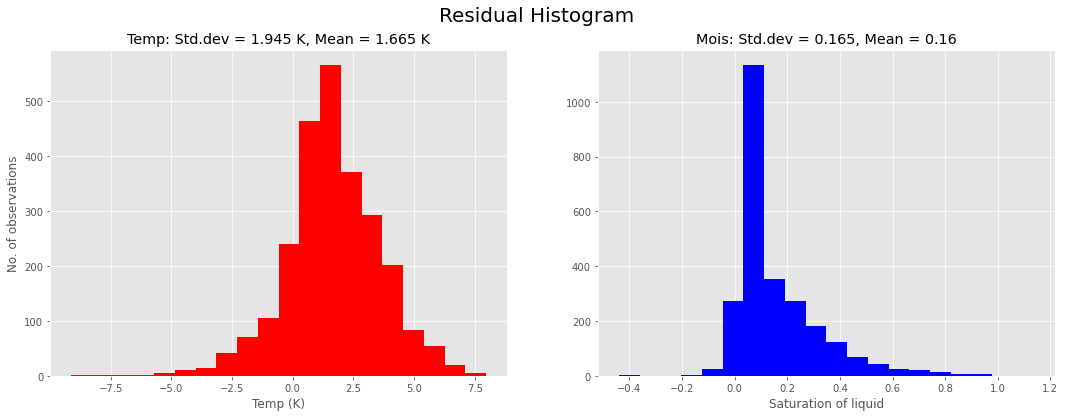

In [160]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Residual Histogram', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hist(temp_res, bins=20, color='r')
ax2.hist(mois_res, bins=20, color='b')
ax1.set_ylabel('No. of observations')
ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
ax1.set_xlabel('Temp (K)')
ax2.set_xlabel('Saturation of liquid')
plt.show()

**Comments:

1. The temperature observations show greater standard deviation compared to the moisture - Hence we need to consider to reweight the objective function. 
2.  The temperature is more or less equally distributed along the center. 
3. The moisture depicts a skew along the positive side of saturation of liquid. 

In [161]:
temp_res.describe()

count    2555.000000
mean        1.664660
std         1.945372
min        -9.126736
25%         0.610736
50%         1.657419
75%         2.875546
max         7.963644
Name: Residual, dtype: float64

In [162]:

parsen = example.ParSen(drop_regul=True)
# Note: in the official manuscript the above line was: example.ParSen(r'../cc/Columbia', drop_regul=True)
# that was incorrect, the base name is already known and part of the Pest class (example)
parsen.plot(n=20)

IndexError: arrays used as indices must be of integer (or boolean) type

#### Deal with it later - You may need to download PESTools once more & setup the directory structure properly

In [163]:
res_3.plot_hexbin(['temp', 'mois'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

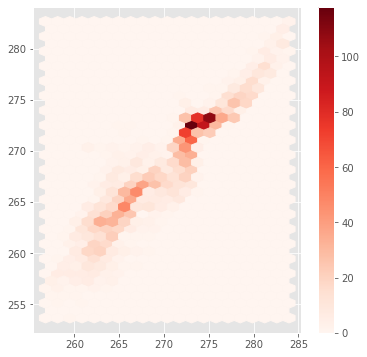

In [164]:
plt.figure(figsize=(6, 6))
plt.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Moisture')

<Figure size 720x432 with 0 Axes>

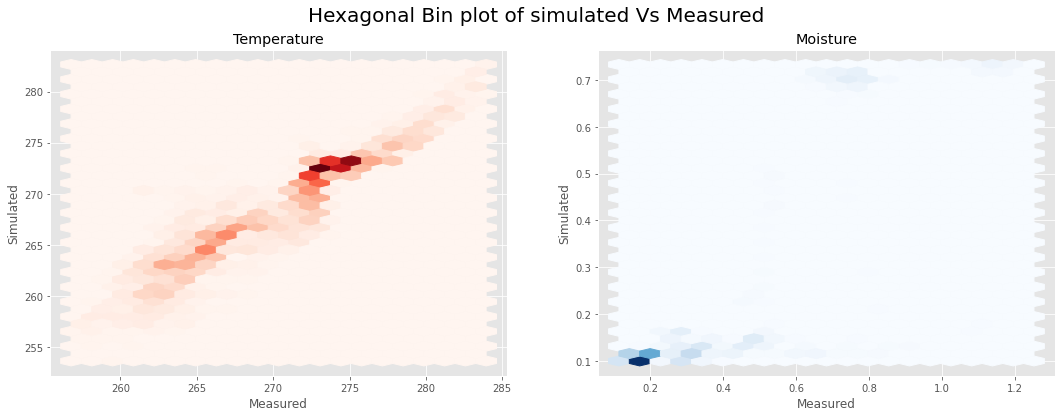

In [165]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hexagonal Bin plot of simulated Vs Measured', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
#plt.colorbar()
ax1.set_ylabel('Simulated')
ax1.set_xlabel('Measured')
ax1.set_title('Temperature')

ax2.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
ax2.set_ylabel('Simulated')
ax2.set_xlabel('Measured')
ax2.set_title('Moisture')

#plt.colorbar(cax=ax1)

#ax1.hist(temp_res, bins=20, color='r')
#ax2.hist(mois_res, bins=20, color='b')
#ax1.set_ylabel('No. of observations')
#ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
#ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
#ax1.set_xlabel('Temp (K)')
#ax2.set_xlabel('Saturation of liquid')
#img1 = ax1.imshow(fig)
#fig.colorbar(img1)

In [166]:
len(np.arange(0,364))

364

In [167]:
len(temp_measured[0:364])

364

Text(0, 0.5, 'Temperature (K)')

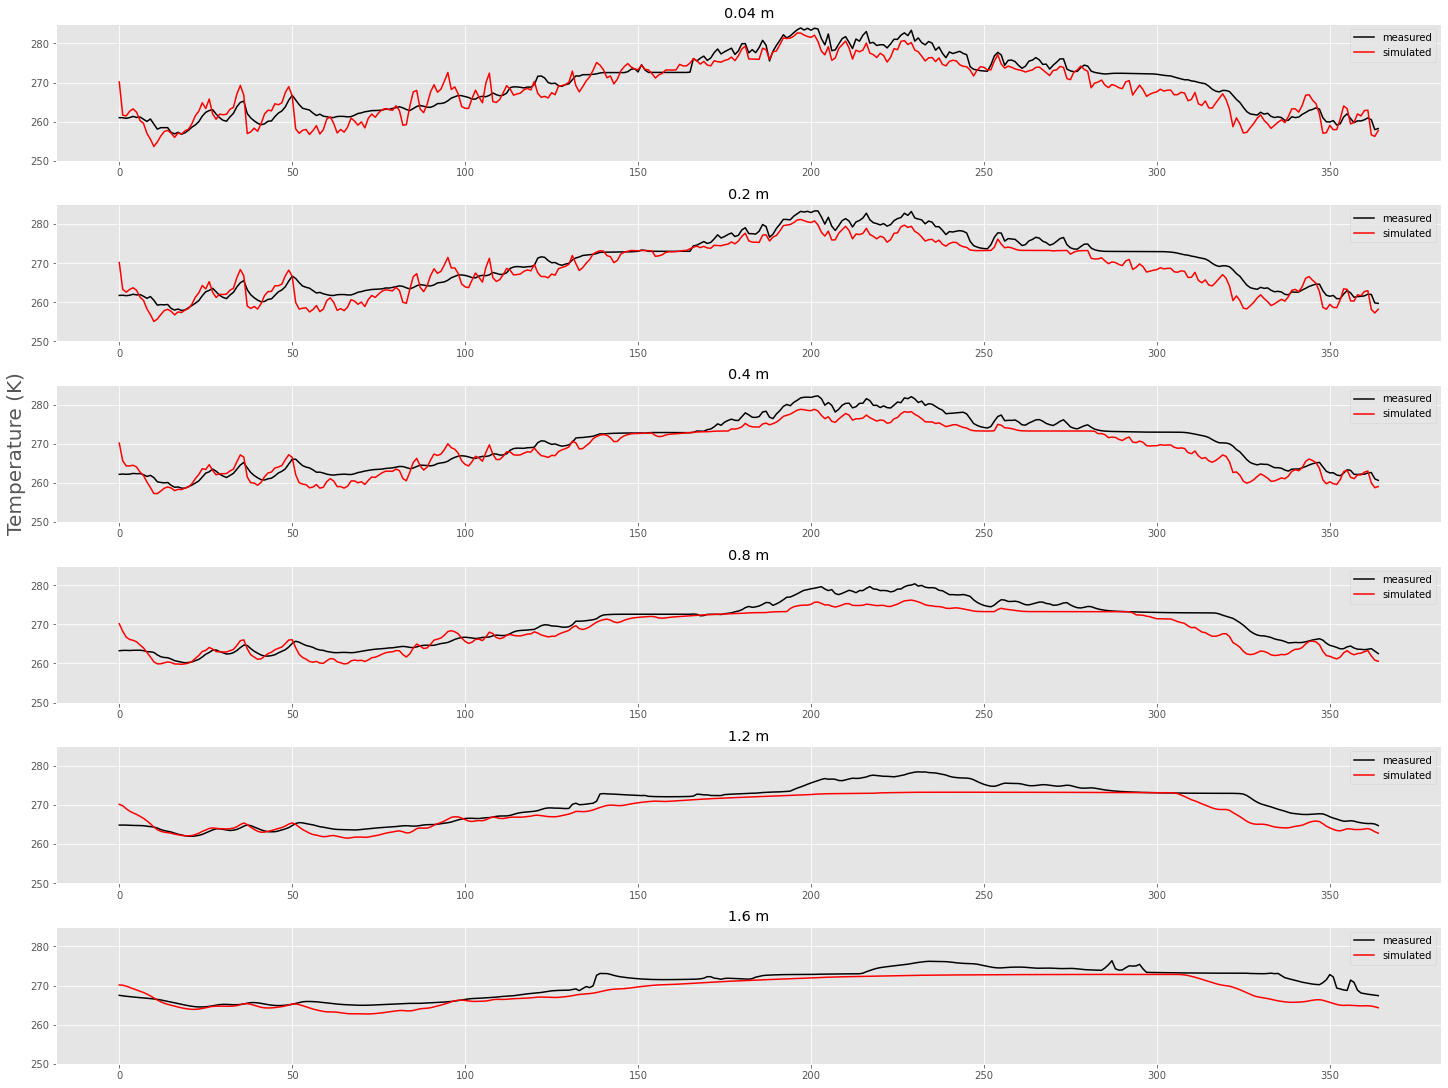

In [168]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil temperature at different depths [K]')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim[x:x+365].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m')
    locals()['f2_ax'+str(j+1)].grid(True)
    locals()['f2_ax'+str(j+1)].legend()
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 365
    
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)

Comments:
* Include the parameters at the top.
* Include the initial measurements without the calibration.
* Include information about the residuals
* Add a heading!
* 

In [169]:
mois_measured

smois_0.04_0     0.160038
smois_0.04_1     0.160179
smois_0.04_2     0.160040
smois_0.04_3     0.160321
smois_0.04_4     0.160742
                   ...   
smois_1.6_360    0.168612
smois_1.6_361    0.167619
smois_1.6_362    0.166811
smois_1.6_363    0.166060
smois_1.6_364    0.165318
Name: Measured, Length: 2555, dtype: float64

Text(0, 0.5, 'Saturation of liquid')

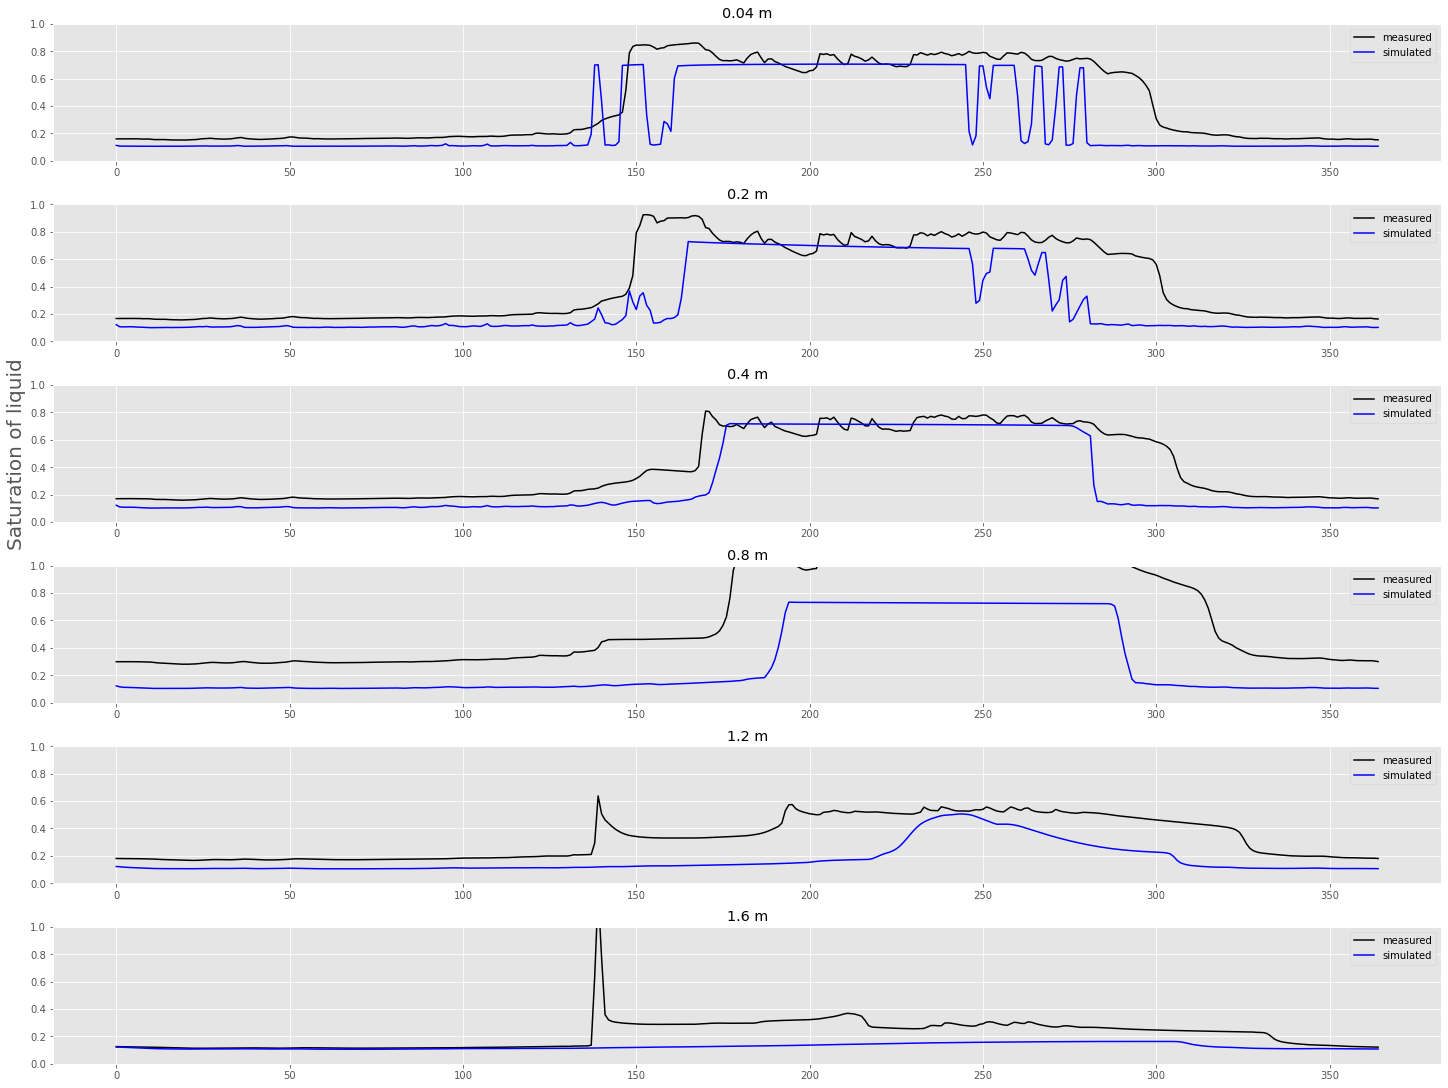

In [170]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil moisture at different depths [K]')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim[x:x+365].values, 'b', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m')
    locals()['f2_ax'+str(j+1)].grid(True)
    locals()['f2_ax'+str(j+1)].legend()
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    
    x = x + 365
    
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)

Comments:

1. We need to change the boundary condition at the top! - Temperature at 0.00 cm
2. Since it is given lesser importance - I think that is why it has not been calibrated properly!

### Parameter sensitivity:


In [174]:
import parsen
import mat_handler

In [175]:
parsen_plots = parsen.ParSen('test_pest_iterations_2.demo/rk_model_glm_cf')

IndexError: arrays used as indices must be of integer (or boolean) type

In [37]:
#fig, ax = res_3.plot_one2one('temp', print_stats=['Mean', 'MAE','RMSE'])